In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('./dataset/dataset.csv')
display(df.head())

df.info()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1366 non-null   float64
 9   year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 106.9+ KB


In [3]:
# Drop rows with nulls
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1365 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1365 non-null   object 
 1   region                        1365 non-null   object 
 2   happiness_score               1365 non-null   float64
 3   gdp_per_capita                1365 non-null   float64
 4   social_support                1365 non-null   float64
 5   healthy_life_expectancy       1365 non-null   float64
 6   freedom_to_make_life_choices  1365 non-null   float64
 7   generosity                    1365 non-null   float64
 8   perceptions_of_corruption     1365 non-null   float64
 9   year                          1365 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 117.3+ KB


### 1.1 Checking the Distribution of the data

<Axes: >

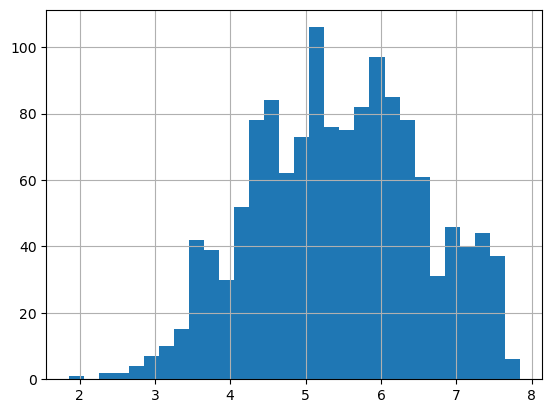

In [4]:
df['happiness_score'].hist(bins=30)

<br><br>

### 1.2 Correlation Analysis

<Axes: >

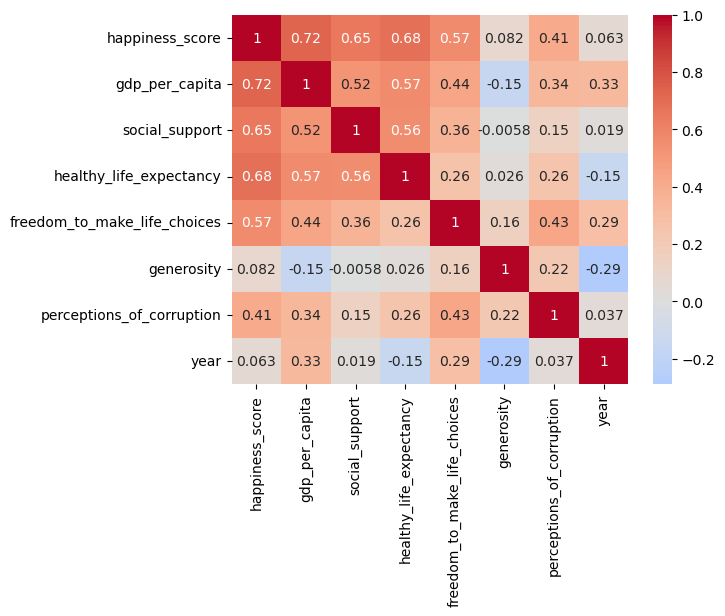

In [5]:
# Correlation heatmap
# Keep only numeric columns for correlation analysis
sns.heatmap(df.select_dtypes("number").corr(),
            annot=True, cmap="coolwarm", center=0)

<br><br>

### 1.3 Pairwise Scatterplots

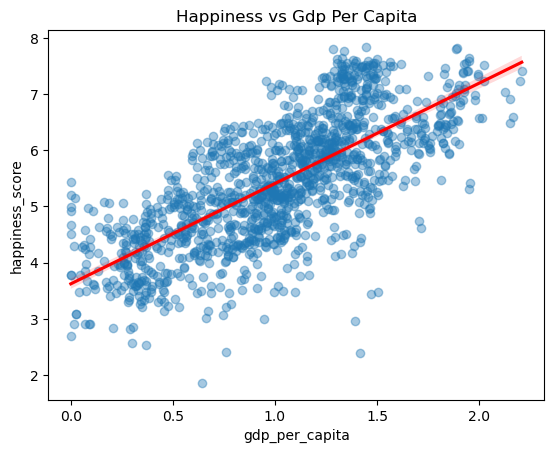

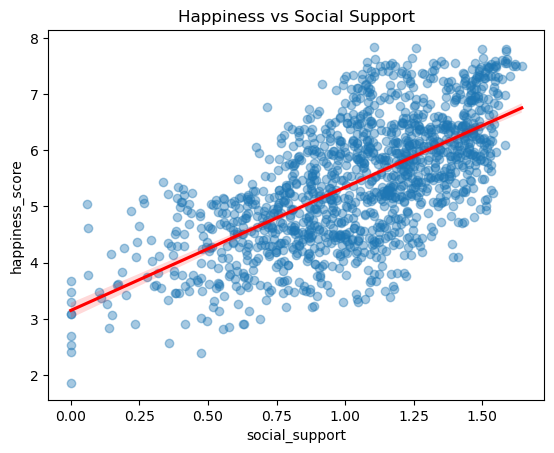

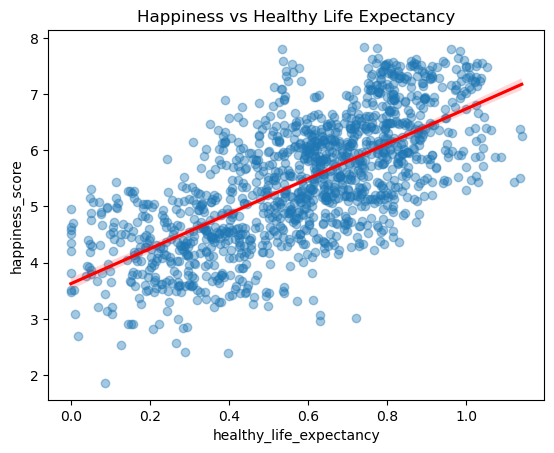

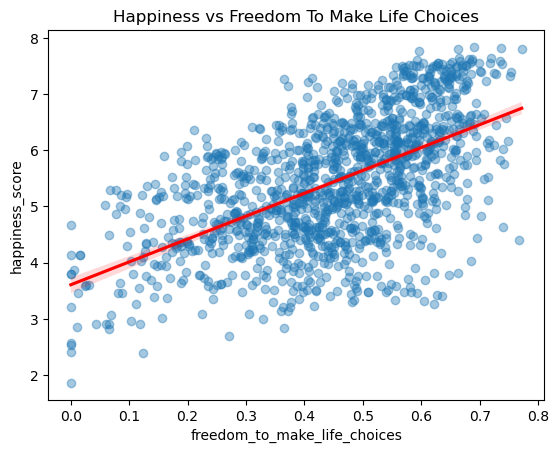

In [6]:
# Scatterplots with regression lines
for feature in ["gdp_per_capita","social_support",
                "healthy_life_expectancy","freedom_to_make_life_choices"]:
    sns.regplot(x=feature, y="happiness_score", data=df,
                scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    plt.title(f"Happiness vs {feature.replace('_',' ').title()}")
    plt.show()

1. Distribution (Histogram)
    - Most countries cluster between 4 and 7 happiness score.
    - Very few extremely low (<3) or extremely high (>7.5) scores.

2. Correlation Heatmap
    - Strongest drivers:
        - GDP per capita (0.72)
        - Healthy life expectancy (0.68)
        - Social support (0.65)
    - Medium driver:
        - Freedom to make life choices (0.57)
    - Weak drivers:
        - Perceptions of corruption (0.42)
        - Generosity (0.08, almost no correlation)
    - Year has weak correlation (0.06), meaning happiness didn’t strongly trend up/down globally overall.

3. Scatterplots with Regression Lines
    - GDP, Social Support, Life Expectancy, Freedom → clear positive slopes.
    - Generosity & corruption (not shown here) → weaker/noisy trends.

<br><br>

### 1.4 Time Trends


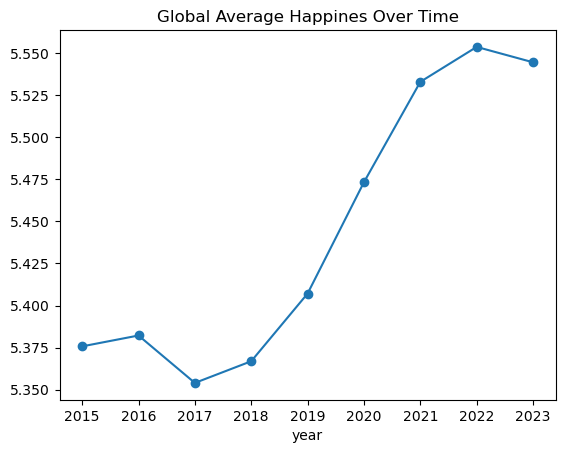

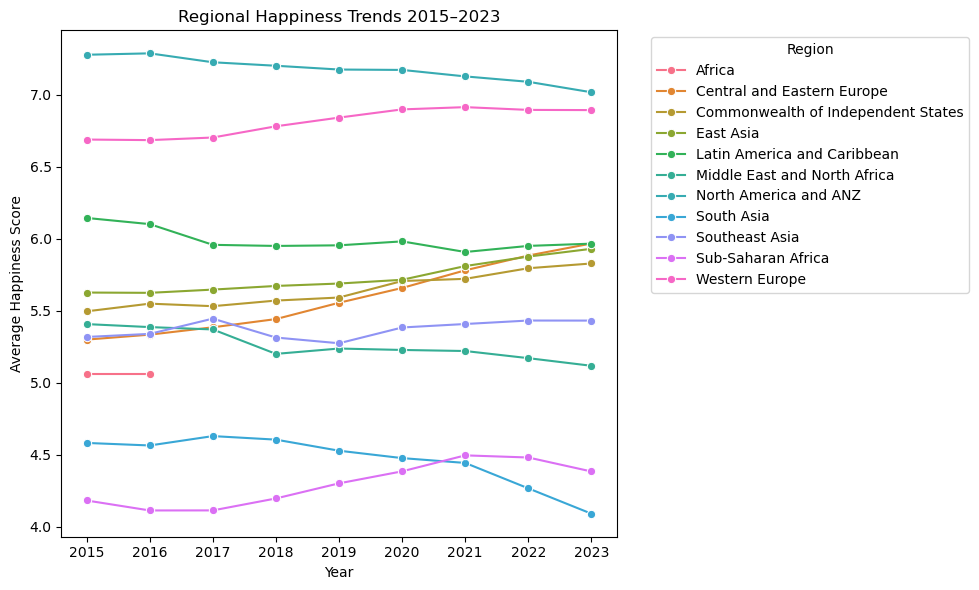

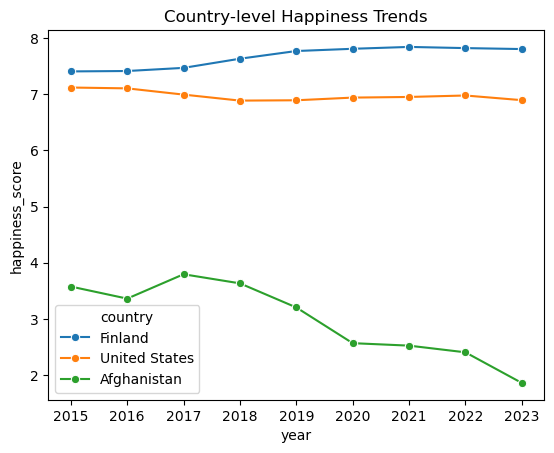

In [7]:
# Glboal trend
global_trend = df.groupby('year')["happiness_score"].mean()
global_trend.plot(marker='o', title="Global Average Happines Over Time")


# Regional trends
region_trends = df.groupby(["year","region"])["happiness_score"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x="year", y="happiness_score", hue="region", data=region_trends, marker="o")

plt.title("Regional Happiness Trends 2015–2023")
plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Example country trends
country_trends = df[df['country'].isin(["Finland", "United States", "Afghanistan"])]
sns.lineplot(x="year", y="happiness_score", hue="country", data=country_trends, marker='o')
plt.title("Country-level Happiness Trends")
plt.show()
                                        

1. Global Average (2015–2023)
    - Pretty stable overall: ~5.35 → ~5.55.
    - Small dip in 2017, strong recovery after 2019, peaking in 2022.

2. Regional Trends (from before, once legend fixed)
    - Western Europe & North America/ANZ consistently top.
    - Sub-Saharan Africa & South Asia consistently lowest.
    - Some mid-tier regions (Latin America, Eastern Europe) show mild fluctuations.

3. Country Trends
    - Finland steadily rising → consistently #1 since ~2018.
    - United States flat/slight decline → hovering ~7.0.
    - Afghanistan sharp decline post-2017 → now the lowest globally.

<br><br>

### 1.5 Ranking

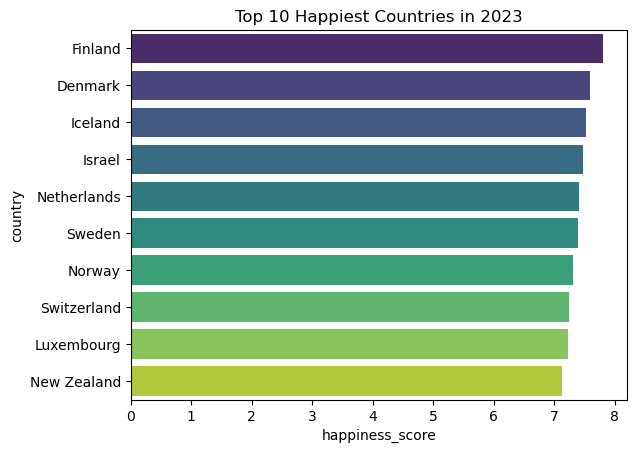

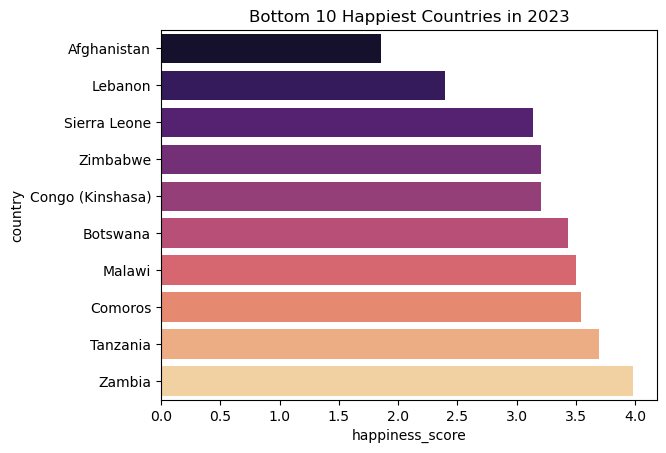

In [8]:
# Top 10 happiest countries lastest year
latest_year = df['year'].max()
top10 =df[df['year']==latest_year].nlargest(10, 'happiness_score')

sns.barplot(x="happiness_score", y="country", data=top10, hue="country", dodge=False, legend=False, palette="viridis")
plt.title(f"Top 10 Happiest Countries in {latest_year}")
plt.show()

# Bottom 10 happiest countries lastest year
bottom10 =df[df['year']==latest_year].nsmallest(10, 'happiness_score')

sns.barplot(x="happiness_score", y="country", data=bottom10, hue="country", dodge=False, legend=False, palette="magma")
plt.title(f"Bottom 10 Happiest Countries in {latest_year}")
plt.show()



### Top 10 Happiess Countries for 2023:
- Finland is clearly the topest(score ~7.5)
- Denmark and Iceland are following it (score ~7.3 and ~7.4)

### Bottom 10 Happiess Countries for 2023:
- Afghanistan is clearly the lowest (score ~1.9).
- Several Sub-Saharan African countries dominate the bottom of the list.
- Lebanon also shows up very low, reflecting its recent crises.<br><br>

<br><br>

## Exploratory Data Analysis (EDA) Summary

### 1. Distribution of Happiness Scores
- Happiness scores (2015–2023) range between **~2 and ~8**.
- The majority of countries fall between **4 and 7**.
- Very few countries achieve extremely low or extremely high scores.


### 2. Correlation Insights
- **GDP per capita (0.72)**, **social support (0.65)**, and **healthy life expectancy (0.68)** show the strongest positive correlation with happiness.
- **Freedom to make life choices (0.57)** also has a significant positive correlation.
- **Generosity (0.08)** has a weak correlation with happiness.
- **Perceptions of corruption (0.41)** shows moderate correlation.
- Year itself has very low correlation, meaning global scores are fairly stable.



### 3. Key Relationships
- **Happiness increases** with higher GDP, stronger social support, longer healthy life expectancy, and greater freedom of choice.
- Scatter plots confirm clear **positive linear trends** for these key features.



### 4. Regional Analysis
- **Western Europe, North America, and ANZ** report the **highest average happiness**.
- **Sub-Saharan Africa and South Asia** consistently have **lower scores**.
- Regional happiness is relatively stable over time, with **Western Europe leading**.


### 5. Country-Level Trends
- **Finland** remains the happiest country with consistently high scores since 2015.
- **United States** shows stable but slightly lower scores (~6.8–7.1).
- **Afghanistan** ranks the lowest, with a sharp decline after 2018.



### 6. Top & Bottom Countries in 2023
- **Top 10 Happiest Countries:** Finland, Denmark, Iceland, Israel, Netherlands, Sweden, Norway, Switzerland, Luxembourg, New Zealand.
- **Bottom 10 Happiest Countries:** Afghanistan, Lebanon, Sierra Leone, Zimbabwe, Congo (Kinshasa), Botswana, Malawi, Comoros, Tanzania, Zambia.



### 7. Global Happiness Trend
- Global average happiness is **stable around 5.3–5.5**.
- A slight increase is visible after 2018, peaking around 2022.



## Key Takeaways
- Economic prosperity (**GDP per capita**) and social well-being (**support, health, freedom**) are the most critical drivers of happiness.
- Regions differ significantly, highlighting inequalities.
- Despite yearly variations, **global happiness levels remain stable**.


***

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## Preparing Data for Modeling

Separating the Categorical and Numeric data

In [10]:
df_cat = df[['country','region']]
df_num = df.drop(['country','region'], axis=1)

Using OneHotEncoder to encode the categorical data

In [11]:
ohe = OneHotEncoder(drop='first') #initializing encoder
ohe.fit(df_cat)
df_cat_new = ohe.transform(df_cat).toarray()
df_cat_new

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

I actually do not want an array at this time. Instead I will use get_dummies

In [12]:
df_cat_dummy = pd.get_dummies(df_cat, drop_first='True')
df_cat_dummy

,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,...,region_Central and Eastern Europe,region_Commonwealth of Independent States,region_East Asia,region_Latin America and Caribbean,region_Middle East and North Africa,region_North America and ANZ,region_South Asia,region_Southeast Asia,region_Sub-Saharan Africa,region_Western Europe
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1364,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [13]:
#combining encoded category df with numeric df
new_df = pd.concat([df_cat_dummy, df_num], axis=1)
new_df

,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,...,region_Sub-Saharan Africa,region_Western Europe,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,False,False,False,False,False,False,False,False,False,False,...,False,True,7.804,1.88800,1.58500,0.53500,0.77200,0.12600,0.53500,2023
1,False,False,False,False,False,False,False,False,False,False,...,False,True,7.586,1.94900,1.54800,0.53700,0.73400,0.20800,0.52500,2023
2,False,False,False,False,False,False,False,False,False,False,...,False,True,7.530,1.92600,1.62000,0.55900,0.73800,0.25000,0.18700,2023
3,False,False,False,False,False,False,False,False,False,False,...,False,False,7.473,1.83300,1.52100,0.57700,0.56900,0.12400,0.15800,2023
4,False,False,False,False,False,False,False,False,False,False,...,False,True,7.403,1.94200,1.48800,0.54500,0.67200,0.25100,0.39400,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,False,False,False,False,False,False,False,False,False,False,...,True,False,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191,2015
1363,False,False,False,False,False,False,False,False,False,False,...,True,False,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,2015
1364,False,False,False,False,False,False,False,False,False,False,...,False,False,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906,2015
1365,False,False,False,False,False,False,False,False,False,False,...,True,False,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062,2015


## Features, Target, Training Set, Validation Set, and Test Set

In [14]:
features = new_df.drop('happiness_score', axis=1)
target = new_df['happiness_score']

#goal is to make a 60:20:20 split
features_intermediate, features_test, target_intermediate, target_test = train_test_split(features, target, test_size=0.20) #20% test set

features_train, features_valid, target_train, target_valid = train_test_split(features_intermediate, target_intermediate, test_size=0.25) # 25% of 80 = 20

### Decision Tree Model

In [15]:
#establishing values for comparison
best_rmse = 10000
best_r2 = 0
best_mae = 10000
best_depth = 0

In [16]:
for depth in range(1,7): #established desired range
    model_dt = DecisionTreeRegressor(random_state=616, max_depth=depth)
    model_dt.fit(features_train, target_train)
    predictions_valid_dt = model_dt.predict(features_valid)
    rmse = mean_squared_error(target_valid, predictions_valid_dt)**0.5
    if rmse < best_rmse:
        best_rmse = rmse
        best_depth = depth
f"Best RMSE Value: {best_rmse}, Best Depth: {best_depth}"

'Best RMSE Value: 0.5711911118086472, Best Depth: 6'

In [17]:
for depth in range(1,7):
    model_dt = DecisionTreeRegressor(random_state=616, max_depth=depth)
    model_dt.fit(features_train, target_train)
    predictions_valid_dt = model_dt.predict(features_valid)
    r2 = r2_score(target_valid, predictions_valid_dt)
    if r2 > best_r2:
        best_r2 = r2
        best_depth = depth
f"Best R2 Value: {best_r2}, Best Depth: {best_depth}"

'Best R2 Value: 0.7470367053159235, Best Depth: 6'

In [18]:
for depth in range(1,7):
    model_dt = DecisionTreeRegressor(random_state=616, max_depth=depth)
    model_dt.fit(features_train, target_train)
    predictions_valid_dt = model_dt.predict(features_valid)
    mae = mean_absolute_error(target_valid, predictions_valid_dt)
    if mae < best_mae:
        best_mae = mae
        best_depth = depth
f"Best MAE Value: {best_mae}, Best Depth: {best_depth}"

'Best MAE Value: 0.43281985128275124, Best Depth: 6'

__With the dataset as is, this model seems to be attaining low to mid metric values.__

__Will proceed with Random Forest__

## Random Forest Model

In [19]:
#values for comparison
best_rmse = 10000
best_r2 = 0
best_mae = 10000
best_depth = 0
best_est = 0

In [20]:
for est in range(10, 51, 10):
    for depth in range(1,11):
        model_rf = RandomForestRegressor(random_state=616, n_estimators=est, max_depth=depth)
        model_rf.fit(features_train, target_train)
        predictions_valid_rf = model_rf.predict(features_valid)
        rmse = mean_squared_error(target_valid, predictions_valid_rf)**0.5
        if rmse < best_rmse:
            best_rmse = rmse
            best_est = est
            best_depth = depth
f"Best RMSE: {best_rmse}, Best Number of Estimators: {best_est}, Best Depth: {best_depth}"

'Best RMSE: 0.4361193712606217, Best Number of Estimators: 50, Best Depth: 10'

In [21]:
for est in range(10, 51, 10):
    for depth in range(1,11):
        model_rf = RandomForestRegressor(random_state=616, n_estimators=est, max_depth=depth)
        model_rf.fit(features_train, target_train)
        predictions_valid_rf = model_rf.predict(features_valid)
        r2 = r2_score(target_valid, predictions_valid_rf)
        if r2 > best_r2:
            best_r2 = r2
            best_est = est
            best_depth = depth
f"Best R2 Score: {best_r2}, Best Number of Estimators: {best_est}, Best Depth: {best_depth}"

'Best R2 Score: 0.852529422168457, Best Number of Estimators: 50, Best Depth: 10'

In [22]:
for est in range(10, 51, 10):
    for depth in range(1,11):
        model_rf = RandomForestRegressor(random_state=616, n_estimators=est, max_depth=depth)
        model_rf.fit(features_train, target_train)
        predictions_valid_rf = model_rf.predict(features_valid)
        mae = mean_absolute_error(target_valid, predictions_valid_rf)
        if mae < best_mae:
            best_mae = mae
            best_est = est
            best_depth = depth
f"Best RMSE: {best_mae}, Best Number of Estimators: {best_est}, Best Depth: {best_depth}"

'Best RMSE: 0.32132023320048503, Best Number of Estimators: 50, Best Depth: 10'

__Mostly low Metric Values again. Except the R2 score is not the worst. A 0.687 is getting closer to a desired value.__

## Linear Regression Model

In [23]:
model_lr = LinearRegression()
model_lr.fit(features_train, target_train)
predictions_valid_lr = model_lr.predict(features_valid)

rmse_lr = mean_squared_error(target_valid, predictions_valid_lr)**0.5
r2_lr = r2_score(target_valid, predictions_valid_lr)
mae_lr = mean_absolute_error(target_valid, predictions_valid_lr)

print(f"RMSE: {rmse_lr}")
print(f"R2 Score: {r2_lr}")
print(f"MAE: {mae_lr}")

RMSE: 25195441184.2797
R2 Score: -4.921965466235155e+20
MAE: 2300849300.5971084


<span style='color:red'> __Oh gosh, we won't be using that again__ </span>

## Ridge Model

Never attempted this model before. But I came across it in the sklearn documentation.

In [24]:
model_r = Ridge(random_state=616) #initializing model
model_r.fit(features_train, target_train) #fitting
predictions_valid_r = model_r.predict(features_valid) #predicting
r2_r = r2_score(target_valid, predictions_valid_r) #r2 score
r2_r

0.8973112227940332

<span style='color:green'> __This score of about 0.915 is ASTRONOMICAL! Let's check how the other metrics do.__ </span>

In [25]:
rmse_r = mean_squared_error(target_valid, predictions_valid_r)**0.5
rmse_r

0.36392691632506624

In [26]:
mae_r = mean_absolute_error(target_valid, predictions_valid_r)
mae_r

0.25875095273366094

To my suprise these metrics did not perform as well. The documentation uses the R2 score as it's base score calculation so it must work best with it.

### Testing Ridge on test set

In [27]:
predictions_test_r = model_r.predict(features_test)
r2_test_r = r2_score(target_test, predictions_test_r)
f"R2 Score for Ridge Model: {r2_test_r}"

'R2 Score for Ridge Model: 0.9086563611706493'

<span style='color:green'> __OK! Not too bad! About 0.90!__ </span>

It is possible that randomizing the data caused the training, validation, and test set to contain a spread of years. So fitting the model to the training set maybe made it too easy to predict the validation and test set. Since our objective to to understand what may happen in the future, it may be best avoid the later years to be in the training set.

In [28]:
new_df = new_df.sort_values('year')
new_df

,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,...,region_Sub-Saharan Africa,region_Western Europe,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
1366,False,False,False,False,False,False,False,False,False,False,...,True,False,2.839,0.20868,0.13995,0.28443,0.36453,0.16681,0.10731,2015
1264,False,False,False,False,False,False,False,False,False,False,...,False,False,5.833,1.14723,1.25745,0.73128,0.21342,0.02641,0.01031,2015
1263,False,False,False,False,False,False,False,False,False,False,...,False,False,5.848,1.18498,1.27385,0.87337,0.60855,0.25328,0.03787,2015
1262,False,False,False,False,False,False,False,False,False,False,...,False,False,5.855,1.12254,1.12241,0.64368,0.51649,0.11827,0.08454,2015
1261,False,False,False,False,False,False,False,False,False,False,...,False,False,5.878,0.75985,1.30477,0.66098,0.53899,0.34240,0.08242,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,False,False,False,False,False,False,False,False,False,False,...,False,False,5.109,1.47700,0.94700,0.36600,0.53900,0.00000,0.20100,2023
88,False,False,False,False,False,False,False,False,False,False,...,False,False,5.111,1.23200,0.85300,0.25700,0.71500,0.18500,0.16200,2023
87,False,False,False,False,False,False,False,False,False,False,...,False,False,5.211,0.00000,1.25700,0.34100,0.36900,0.20500,0.08400,2023
93,False,False,False,False,False,False,False,False,False,False,...,True,False,5.035,1.43800,1.02100,0.18300,0.34600,0.03600,0.10200,2023


In [29]:
training_byyear = new_df[new_df['year']<= 2019]
training_byyear

,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,...,region_Sub-Saharan Africa,region_Western Europe,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
1366,False,False,False,False,False,False,False,False,False,False,...,True,False,2.839,0.20868,0.13995,0.28443,0.36453,0.16681,0.10731,2015
1264,False,False,False,False,False,False,False,False,False,False,...,False,False,5.833,1.14723,1.25745,0.73128,0.21342,0.02641,0.01031,2015
1263,False,False,False,False,False,False,False,False,False,False,...,False,False,5.848,1.18498,1.27385,0.87337,0.60855,0.25328,0.03787,2015
1262,False,False,False,False,False,False,False,False,False,False,...,False,False,5.855,1.12254,1.12241,0.64368,0.51649,0.11827,0.08454,2015
1261,False,False,False,False,False,False,False,False,False,False,...,False,False,5.878,0.75985,1.30477,0.66098,0.53899,0.34240,0.08242,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,False,False,False,False,False,False,False,False,False,False,...,False,False,5.648,1.18300,1.45200,0.72600,0.33400,0.08200,0.03100,2019
649,False,False,False,False,False,False,False,False,False,False,...,False,False,5.697,0.96000,1.27400,0.85400,0.45500,0.08300,0.02700,2019
648,False,False,False,False,False,False,False,False,False,False,...,False,True,5.718,1.26300,1.25200,1.04200,0.41700,0.19100,0.16200,2019
647,False,False,False,False,False,False,False,False,False,False,...,False,False,5.743,0.85500,1.47500,0.77700,0.51400,0.18400,0.08000,2019


In [30]:
validation_byyear = new_df[(new_df['year']>2019) & (new_df['year']<=2021)]
validation_byyear

,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,...,region_Sub-Saharan Africa,region_Western Europe,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
479,False,False,False,False,False,False,False,False,False,False,...,False,False,6.1021,1.424834,1.244780,0.776469,0.570261,0.132751,0.112815,2020
484,False,False,False,False,False,False,False,False,False,False,...,False,False,6.0004,1.164307,1.423009,0.806794,0.386402,0.070491,0.027548,2020
483,False,False,False,False,False,False,False,False,False,False,...,False,False,6.0060,0.775121,1.245382,0.602189,0.621915,0.129260,0.130386,2020
482,False,False,False,False,False,False,False,False,False,False,...,False,False,6.0218,1.192441,1.453233,0.842615,0.576665,0.125137,0.201767,2020
481,False,False,False,False,False,False,False,False,False,False,...,False,False,6.0579,1.122594,1.453268,0.698789,0.497432,0.153714,0.110464,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,False,False,False,False,False,False,False,False,False,False,...,True,False,5.0450,0.507000,0.058000,0.196000,0.457000,0.166000,0.178000,2021
380,False,False,False,False,False,False,False,False,False,False,...,True,False,5.0510,0.367000,0.511000,0.210000,0.384000,0.465000,0.123000,2021
379,False,False,False,False,False,False,False,False,False,False,...,False,False,5.0660,1.046000,1.172000,0.439000,0.602000,0.366000,0.033000,2021
378,False,False,False,False,False,False,False,False,False,False,...,True,False,5.0740,0.162000,0.402000,0.167000,0.516000,0.200000,0.157000,2021


In [31]:
test_byyear = new_df[new_df['year']>2021]
test_byyear

,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,...,region_Sub-Saharan Africa,region_Western Europe,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
184,False,False,False,False,False,False,False,False,False,False,...,False,False,6.123,1.758,1.174,0.712,0.523,0.124,0.140,2022
188,False,False,False,False,False,False,False,False,False,False,...,True,False,6.071,1.591,1.116,0.568,0.589,0.131,0.107,2022
187,False,False,False,False,False,False,False,False,False,False,...,False,False,6.086,1.748,1.233,0.668,0.485,0.078,0.064,2022
186,False,False,False,False,False,False,False,False,False,False,...,False,False,6.106,1.904,0.983,0.747,0.617,0.087,0.147,2022
185,False,False,False,False,False,False,False,False,False,False,...,False,False,6.120,1.265,0.768,0.607,0.666,0.089,0.212,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,False,False,False,False,False,False,False,False,False,False,...,False,False,5.109,1.477,0.947,0.366,0.539,0.000,0.201,2023
88,False,False,False,False,False,False,False,False,False,False,...,False,False,5.111,1.232,0.853,0.257,0.715,0.185,0.162,2023
87,False,False,False,False,False,False,False,False,False,False,...,False,False,5.211,0.000,1.257,0.341,0.369,0.205,0.084,2023
93,False,False,False,False,False,False,False,False,False,False,...,True,False,5.035,1.438,1.021,0.183,0.346,0.036,0.102,2023


In [32]:
features_train_byyear = training_byyear.drop('happiness_score', axis=1)
target_train_byyear = training_byyear['happiness_score']
features_valid_byyear = validation_byyear.drop('happiness_score', axis=1)
target_valid_byyear = validation_byyear['happiness_score']
features_test_byyear = test_byyear.drop('happiness_score', axis=1)
target_test_byyear = test_byyear['happiness_score']

In [33]:
model_r2 = Ridge(random_state=616)
model_r2.fit(features_train_byyear, target_train_byyear)
predictions_valid_r2 = model_r2.predict(features_valid_byyear)
r2_score_r2 = r2_score(target_valid_byyear, predictions_valid_r2)
r2_score_r2

0.8400575242437841

In [34]:
predictions_test_r2 = model_r2.predict(features_test_byyear)
r2_score_test_r2 = r2_score(target_test_byyear, predictions_test_r2)
r2_score_test_r2

0.8085035181579637

Trying the modeling again without the year as a feature

In [35]:
features_train_byyear = training_byyear.drop(['happiness_score','year'], axis=1)

features_valid_byyear = validation_byyear.drop(['happiness_score','year'], axis=1)

features_test_byyear = test_byyear.drop(['happiness_score','year'], axis=1)

In [36]:
model_r3 = Ridge(random_state=616)
model_r3.fit(features_train_byyear, target_train_byyear)
predictions_valid_r3 = model_r3.predict(features_valid_byyear)
r2_score_r3 = r2_score(target_valid_byyear, predictions_valid_r3)
r2_score_r3

0.8786808228606138

In [37]:
predictions_test_r3 = model_r3.predict(features_test_byyear)
r2_score_test_r3 = r2_score(target_test_byyear, predictions_test_r3)
r2_score_test_r3

0.7029603073821042

## Lasso Model

In [38]:
model_l = Lasso(random_state=616)
model_l.fit(features_train_byyear, target_train_byyear)
predictions_valid_l = model_l.predict(features_valid_byyear)
r2_score_l = r2_score(target_valid_byyear, predictions_valid_l)
r2_score_l

-0.013230979740614268

Yikes, let's never do that again

## ElasticNet Model

In [39]:
model_en = ElasticNet(random_state=616)
model_en.fit(features_train_byyear, target_train_byyear)
predictions_valid_en = model_en.predict(features_valid_byyear)
r2_score_en = r2_score(target_valid_byyear, predictions_valid_en)
r2_score_en

-0.013230979740614268

This is atrocious

### Decision Tree with no year feature

In [40]:
best_depth = 0
best_result = 0

for depth in range(1,7):
    model_dt2 = DecisionTreeRegressor(random_state=616, max_depth=depth)
    model_dt2.fit(features_train_byyear, target_train_byyear)
    predictions_valid_dt2 = model_dt2.predict(features_valid_byyear)
    result = r2_score(target_valid_byyear, predictions_valid_dt2)
    if result > best_result:
        best_result = result
        best_depth = depth
f"Best R2 Score: {best_result}, Best Depth: {best_depth}"

'Best R2 Score: 0.7284582320633022, Best Depth: 6'

### Random Forest without year feature

In [41]:
best_est = 0
best_depth = 0
best_r2 = 0

for est in range(10, 51, 10):
    for depth in range(1,11):
        model_rf2 = RandomForestRegressor(random_state=616, n_estimators=est, max_depth=depth)
        model_rf2.fit(features_train_byyear, target_train_byyear)
        predictions_valid_rf2 = model_rf2.predict(features_valid_byyear)
        r2 = r2_score(target_valid_byyear, predictions_valid_rf2)
        if r2 > best_r2:
            best_r2 = r2
            best_est = est
            best_depth = depth
f"Best R2 Score: {best_r2}, Best Number of Estimators: {best_est}, Best Depth: {best_depth}"

'Best R2 Score: 0.8332285658641958, Best Number of Estimators: 40, Best Depth: 10'

### Trying a different breakdown of years

Training 2015-2020, Validation 2021-2022, Test 2023

In [43]:
training_byyear2 = new_df[new_df['year']<= 2020]
validation_byyear2 = new_df[(new_df['year']>2020) & (new_df['year']<=2022)]
test_byyear2 = new_df[new_df['year']>2022]

In [44]:
# features and targets with year feature
features_train_byyear2 = training_byyear2.drop('happiness_score', axis=1)
target_train_byyear2 = training_byyear2['happiness_score']
features_valid_byyear2 = validation_byyear2.drop('happiness_score', axis=1)
target_valid_byyear2 = validation_byyear2['happiness_score']
features_test_byyear2 = test_byyear2.drop('happiness_score', axis=1)
target_test_byyear2 = test_byyear2['happiness_score']

### Ridge

In [45]:
model_r4 = Ridge(random_state=616)
model_r4.fit(features_train_byyear2, target_train_byyear2)
predictions_valid_r4 = model_r4.predict(features_valid_byyear2)
r2_score_r4 = r2_score(target_valid_byyear2, predictions_valid_r4)
r2_score_r4

0.8180536511209326

Not higher than previous model

### Decision Tree

In [47]:
best_depth = 0
best_result = 0

for depth in range(1,7):
    model_dt3 = DecisionTreeRegressor(random_state=616, max_depth=depth)
    model_dt3.fit(features_train_byyear2, target_train_byyear2)
    predictions_valid_dt3 = model_dt3.predict(features_valid_byyear2)
    result = r2_score(target_valid_byyear2, predictions_valid_dt3)
    if result > best_result:
        best_result = result
        best_depth = depth
f"Best R2 Score: {best_result}, Best Depth: {best_depth}"

'Best R2 Score: 0.6065871263724127, Best Depth: 6'

That's quite low

### Random Forest

In [48]:
best_est = 0
best_depth = 0
best_r2 = 0

for est in range(10, 51, 10):
    for depth in range(1,11):
        model_rf3 = RandomForestRegressor(random_state=616, n_estimators=est, max_depth=depth)
        model_rf3.fit(features_train_byyear2, target_train_byyear2)
        predictions_valid_rf3 = model_rf3.predict(features_valid_byyear2)
        r2 = r2_score(target_valid_byyear2, predictions_valid_rf3)
        if r2 > best_r2:
            best_r2 = r2
            best_est = est
            best_depth = depth
f"Best R2 Score: {best_r2}, Best Number of Estimators: {best_est}, Best Depth: {best_depth}"

'Best R2 Score: 0.742797201585724, Best Number of Estimators: 10, Best Depth: 9'

This is also low

Lets try without the year

In [49]:
features_train_byyear2 = training_byyear2.drop(['happiness_score','year'], axis=1)

features_valid_byyear2 = validation_byyear2.drop(['happiness_score','year'], axis=1)

features_test_byyear2 = test_byyear2.drop(['happiness_score','year'], axis=1)

### Ridge without year feature

In [51]:
model_r5 = Ridge(random_state=616)
model_r5.fit(features_train_byyear2, target_train_byyear2)
predictions_valid_r5 = model_r5.predict(features_valid_byyear2)
r2_score_r5 = r2_score(target_valid_byyear2, predictions_valid_r5)
r2_score_r5

0.8019642228979764

### Decision Tree without year feature

In [52]:
best_depth = 0
best_result = 0

for depth in range(1,7):
    model_dt4 = DecisionTreeRegressor(random_state=616, max_depth=depth)
    model_dt4.fit(features_train_byyear2, target_train_byyear2)
    predictions_valid_dt4 = model_dt4.predict(features_valid_byyear2)
    result = r2_score(target_valid_byyear2, predictions_valid_dt4)
    if result > best_result:
        best_result = result
        best_depth = depth
f"Best R2 Score: {best_result}, Best Depth: {best_depth}"

'Best R2 Score: 0.6117247712393206, Best Depth: 6'

### Random Forest without year feature

In [53]:
best_est = 0
best_depth = 0
best_r2 = 0

for est in range(10, 51, 10):
    for depth in range(1,11):
        model_rf4 = RandomForestRegressor(random_state=616, n_estimators=est, max_depth=depth)
        model_rf4.fit(features_train_byyear2, target_train_byyear2)
        predictions_valid_rf4 = model_rf4.predict(features_valid_byyear2)
        r2 = r2_score(target_valid_byyear2, predictions_valid_rf4)
        if r2 > best_r2:
            best_r2 = r2
            best_est = est
            best_depth = depth
f"Best R2 Score: {best_r2}, Best Number of Estimators: {best_est}, Best Depth: {best_depth}"

'Best R2 Score: 0.7429578881915466, Best Number of Estimators: 10, Best Depth: 9'

These scores are trash

## Resizing training set and re-establishing features

In [54]:
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Western Europe,7.804,1.88800,1.58500,0.53500,0.77200,0.12600,0.53500,2023
1,Denmark,Western Europe,7.586,1.94900,1.54800,0.53700,0.73400,0.20800,0.52500,2023
2,Iceland,Western Europe,7.530,1.92600,1.62000,0.55900,0.73800,0.25000,0.18700,2023
3,Israel,Middle East and North Africa,7.473,1.83300,1.52100,0.57700,0.56900,0.12400,0.15800,2023
4,Netherlands,Western Europe,7.403,1.94200,1.48800,0.54500,0.67200,0.25100,0.39400,2023
...,...,...,...,...,...,...,...,...,...,...
1362,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191,2015
1363,Benin,Sub-Saharan Africa,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,2015
1364,Syria,Middle East and North Africa,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906,2015
1365,Burundi,Sub-Saharan Africa,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062,2015


The training set will be from 2015-2022, the test set will be 2023

In [57]:
train = df[df['year'] < 2023]
test = df[df['year'] == 2023]
droppies = ['country','region','year', 'happiness_score']

X_train = train.drop(droppies, axis=1)
y_train = train['happiness_score']

X_test = test.drop(droppies, axis=1)
y_test = test['happiness_score']

## Decision Tree with new sets

In [62]:
best_depth = 0
best_result = 0

for depth in range(1,7):
    model_dt5 = DecisionTreeRegressor(random_state=616, max_depth=depth)
    model_dt5.fit(X_train, y_train)
    predictions_test_dt = model_dt5.predict(X_test)
    result = r2_score(y_test, predictions_test_dt)
    if result > best_result:
        best_result = result
        best_depth = depth
f"Best R2 Score: {best_result}, Best Depth: {best_depth}"

'Best R2 Score: 0.5627363380604942, Best Depth: 6'

This is not a good result

## Random Forest with new sets

In [63]:
best_result = 0
best_est = 0
best_depth = 0

for est in range(10, 51, 10):
    for depth in range(1,11):
        model_rf5 = RandomForestRegressor(random_state=616, n_estimators=est, max_depth=depth)
        model_rf5.fit(X_train, y_train)
        predictions_test_rf = model_rf5.predict(X_test)
        result = r2_score(y_test, predictions_test_rf)
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth
f"Best R2 Score: {best_result}, Best Number of Estimators: {best_est}, Best Depth: {best_depth}"

'Best R2 Score: 0.5775926868414045, Best Number of Estimators: 10, Best Depth: 3'

## Ridge with new sets

In [65]:
model_r6 = Ridge(random_state=616)
model_r6.fit(X_train, y_train)
predictions_test_r = model_r6.predict(X_test)
r2score = r2_score(y_test, predictions_test_r)
f"R2 Score: {r2score}"

'R2 Score: 0.7628044066232471'

This is the best score yet

I now want to try the models with the same training breakdown, but with the encoded categorical features.

In [68]:
train2 = new_df[new_df['year'] < 2023]
test2 = new_df[new_df['year'] == 2023]

droppies2 = ['year', 'happiness_score']
X_train2 = train2.drop(droppies2, axis=1)
y_train2 = train2['happiness_score']

X_test2 = test2.drop(droppies2, axis=1)
y_test2 = test2['happiness_score']

### Decision Tree

In [70]:
best_depth = 0
best_result = 0

for depth in range(1,7):
    model_dt6 = DecisionTreeRegressor(random_state=616, max_depth=depth)
    model_dt6.fit(X_train2, y_train2)
    predictions_test_dt = model_dt6.predict(X_test2)
    result = r2_score(y_test2, predictions_test_dt)
    if result > best_result:
        best_result = result
        best_depth = depth
f"Best R2 Score: {best_result}, Best Depth: {best_depth}"

'Best R2 Score: 0.5322761150934382, Best Depth: 5'

### Random Forest

In [71]:
best_result = 0
best_est = 0
best_depth = 0

for est in range(10, 51, 10):
    for depth in range(1,11):
        model_rf6 = RandomForestRegressor(random_state=616, n_estimators=est, max_depth=depth)
        model_rf6.fit(X_train2, y_train2)
        predictions_test_rf = model_rf6.predict(X_test2)
        result = r2_score(y_test2, predictions_test_rf)
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth
f"Best R2 Score: {best_result}, Best Number of Estimators: {best_est}, Best Depth: {best_depth}"

'Best R2 Score: 0.6225996498595219, Best Number of Estimators: 10, Best Depth: 10'

### Ridge

In [72]:
model_r7 = Ridge(random_state=616)
model_r7.fit(X_train2, y_train2)
predictions_test_r2 = model_r7.predict(X_test2)
r2score2 = r2_score(y_test2, predictions_test_r2)
f"R2 Score: {r2score2}"

'R2 Score: 0.884526287313578'

This is an outstanding score